# Decision Tree Classifier

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.pipeline import make_pipeline
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import roc_curve, auc

In [2]:
from Image_Processing_Functions import *

In [3]:
from PIL import Image
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
# Load dataset
dataset_dir = 'dataset'
images1,labels= image_pipeline_with_resize(dataset_dir,128,64)
images2=RGB_to_grayscale(images1)
images=Image_scalling(images2)

Error processing dataset/0/.ipynb_checkpoints: [Errno 13] Permission denied: 'dataset/0/.ipynb_checkpoints'
Error processing dataset/1/.ipynb_checkpoints: [Errno 13] Permission denied: 'dataset/1/.ipynb_checkpoints'


In [6]:
print(len(labels))

600


In [7]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)



In [8]:
# Feature extraction using HOG
X_train_features = HOG_extract_features(X_train)
X_test_features = HOG_extract_features(X_test)


# Decision Tree Classifier

In [9]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree classifier
clf = DecisionTreeClassifier()
history4 = clf.fit(X_train_features, y_train)
# Predict labels for test set
y_pred = clf.predict(X_test_features)


In [10]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.825


In [11]:
precision = precision_score(y_test, y_pred, pos_label='1')
print(precision)

0.7936507936507936


In [12]:
recall = recall_score(y_test, y_pred, pos_label='1')
print(recall)

0.8620689655172413


In [13]:
f1 = f1_score(y_test, y_pred, pos_label='1')
print(f1)

0.8264462809917356


In [14]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[49 13]
 [ 8 50]]


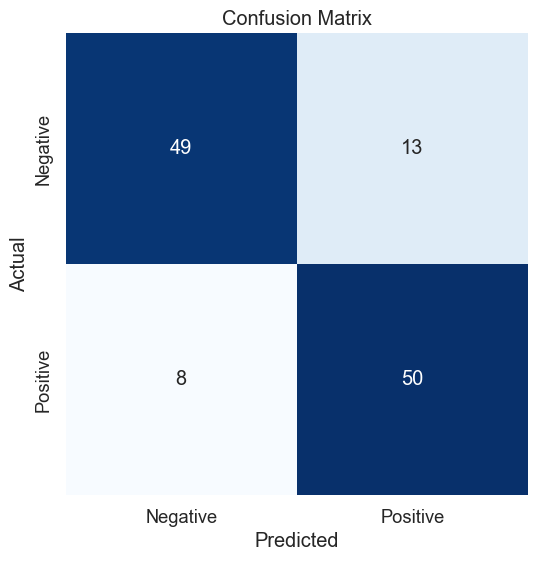

In [15]:
# Plot confusion matrix
sns.set(font_scale=1.2)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, square=True,
            xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

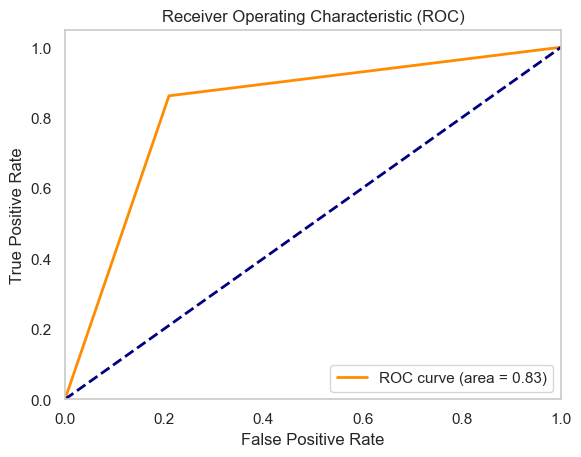

In [16]:
# Predict probabilities for each class
if hasattr(clf, "predict_proba"):
    y_score = clf.predict_proba(X_test_features)[:, 1]  # For binary classification
else:  # For classifiers without predict_proba method, use decision_function
    y_score = clf.decision_function(X_test_features)


# Convert labels to numeric format
y_test_numeric = np.array([int(label) for label in y_test])

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test_numeric, y_score)
roc_auc = auc(fpr, tpr)

# Predict probabilities for each class
if hasattr(clf, "predict_proba"):
    y_score = clf.predict_proba(X_test_features)[:, 1]  # For binary classification
else:  # For classifiers without predict_proba method, use decision_function
    y_score = clf.decision_function(X_test_features)


# Convert labels to numeric format
y_test_numeric = np.array([int(label) for label in y_test])

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test_numeric, y_score)
roc_auc = auc(fpr, tpr)

# Set Seaborn style
sns.set(style="whitegrid")

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid()
plt.show()

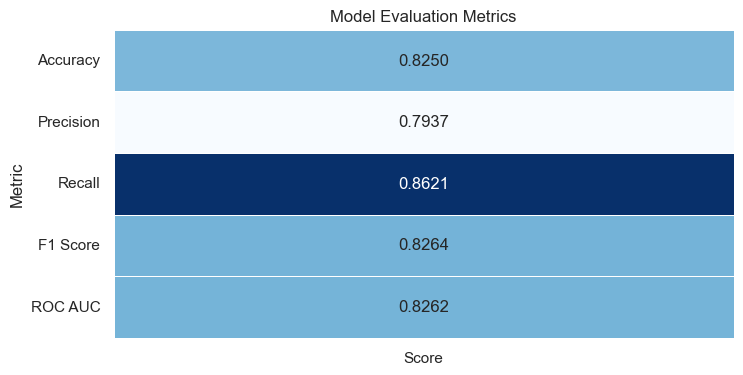

In [17]:
import pandas as pd

# Create a DataFrame to store the results
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'Score': [accuracy, precision, recall, f1, roc_auc]
})

# Create a heatmap-like table using Seaborn
plt.figure(figsize=(8, 4))
sns.heatmap(results.set_index('Metric'), annot=True, cmap="Blues", fmt=".4f", cbar=False, linewidths=0.5)
plt.title('Model Evaluation Metrics')
plt.show()

In [18]:
def print_table(metrics, scores):
    # Find the maximum length of metric name and score to align them properly
    max_metric_len = max(len(metric) for metric in metrics)
    max_score_len = max(len("{:.4f}".format(score)) for score in scores)  # Using string format to handle floats
    
    # Define border characters
    border_top = "+" + "-" * (max_metric_len + 2) + "+" + "-" * (max_score_len + 2) + "+"
    
    # Print the top border
    print(border_top)

    # Print the table headers
    print(f"| {'Metric':<{max_metric_len}} | {'Score':>{max_score_len}} |")

    # Print the middle border
    print(border_top)

    # Print each metric and its corresponding score
    for metric, score in zip(metrics, scores):
        print(f"| {metric:<{max_metric_len}} | {score:>{max_score_len}.4f} |")

    # Print the bottom border
    print(border_top)

# Example usage:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
scores = [accuracy, precision, recall, f1, roc_auc]

print_table(metrics, scores)


+-----------+--------+
| Metric    |  Score |
+-----------+--------+
| Accuracy  | 0.8250 |
| Precision | 0.7937 |
| Recall    | 0.8621 |
| F1 Score  | 0.8264 |
| ROC AUC   | 0.8262 |
+-----------+--------+
